In [3]:
import pennylane as qml
from pennylane import numpy as np
from qiskit.circuit import QuantumCircuit
from qiskit.quantum_info import Statevector
import matplotlib.pyplot as plt

In [7]:
dev = qml.device("default.qubit", wires=2)


@qml.qnode(dev)
def circuit(theta):
    qml.PauliX(wires=1)
    qml.CNOT(wires=[1, 0])
    qml.RY(theta, wires=0)
    # return qml.state()
    return [qml.expval(qml.PauliZ(wires=i)) for i in range(2)]

In [6]:
sv = Statevector(circuit(np.pi))
sv.draw("latex")

<IPython.core.display.Latex object>

In [10]:
# display(dev._circuit.draw(output="mpl"))
drawer = qml.draw(circuit)
print(drawer(np.pi))

0: ────╭X──RY(3.14)─┤  <Z>
1: ──X─╰●───────────┤  <Z>


In [11]:
results = []
for result in circuit(np.pi):
    results.append(result)
print(f"wire 0: {results[0]:.2f}, wire 1: {results[1]:.2f}")

wire 0: 1.00, wire 1: -1.00


In [12]:
def qiskit_circuit(theta):
    qc = QuantumCircuit(2)
    qc.x(1)
    qc.cx(1, 0)
    qc.ry(theta, 0)
    return qc

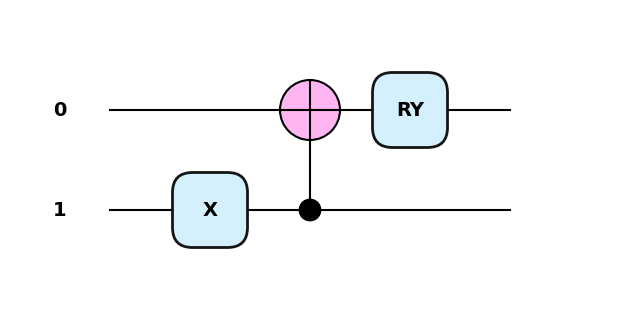

None

wire 0: 1.00, wire 1: -1.00


In [13]:
qc = qiskit_circuit(np.pi)

pl_func = qml.from_qiskit(qc)
qml.draw_mpl(pl_func, style="pennylane")()
display(plt.show())

# compute expected value of PauliZ operator for pl_func
dev = qml.device("default.qubit", wires=2)
@qml.qnode(dev)
def circuit():
    pl_func()
    return [qml.expval(qml.PauliZ(wires=i)) for i in range(2)]

results = []
for result in circuit():
    results.append(result)
print(f"wire 0: {results[0]:.2f}, wire 1: {results[1]:.2f}")